# PCA


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Main_df = pd.read_csv("C:/Users/DELL/Downloads/ML/lncRNA_5_Cancers.csv")

#                                                  Visualizing the lncRNA expression data of five different cancer types using PCA. Reducing the data dimension from 12,309 to two (PC1 and PC2) dimension and plotting the data in reduced dimension. 

In [31]:
from sklearn.preprocessing import StandardScaler              #import the standard scaler
sc  = StandardScaler()                                        #initialise the standard scaler
df  = Main_df                                                 #create a copy of the original dataset
df  = df.drop('Ensembl_ID',axis = 1)                          #drop a column having ID's
df1 = pd.get_dummies(df["Class"])                             #convert categorical data to binary data

In [32]:
df1.head()

,KIRC,LUAD,LUSC,PRAD,THCA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [33]:
df1.value_counts()

KIRC  LUAD  LUSC  PRAD  THCA
1     0     0     0     0       527
0     1     0     0     0       510
      0     0     0     1       501
            1     0     0       498
            0     1     0       493
dtype: int64

In [34]:
df.columns

Index(['ENSG00000005206.15', 'ENSG00000083622.8', 'ENSG00000088970.14',
       'ENSG00000099869.7', 'ENSG00000100181.20', 'ENSG00000104691.13',
       'ENSG00000115934.11', 'ENSG00000117242.7', 'ENSG00000118412.11',
       'ENSG00000122043.9',
       ...
       'ENSGR0000223511.4', 'ENSGR0000223571.4', 'ENSGR0000226179.4',
       'ENSGR0000230542.4', 'ENSGR0000234622.4', 'ENSGR0000236017.6',
       'ENSGR0000236871.5', 'ENSGR0000237531.4', 'ENSGR0000270726.4', 'Class'],
      dtype='object', length=12310)

In [35]:
df[['KIRC','LUAD','LUSC','PRAD','THCA']] = df1[['KIRC','LUAD','LUSC','PRAD','THCA']] #add the converted binary data
df = df.drop('Class',axis = 1)                                                       #drop the categorical data
df.columns

Index(['ENSG00000005206.15', 'ENSG00000083622.8', 'ENSG00000088970.14',
       'ENSG00000099869.7', 'ENSG00000100181.20', 'ENSG00000104691.13',
       'ENSG00000115934.11', 'ENSG00000117242.7', 'ENSG00000118412.11',
       'ENSG00000122043.9',
       ...
       'ENSGR0000234622.4', 'ENSGR0000236017.6', 'ENSGR0000236871.5',
       'ENSGR0000237531.4', 'ENSGR0000270726.4', 'KIRC', 'LUAD', 'LUSC',
       'PRAD', 'THCA'],
      dtype='object', length=12314)

In [36]:
from sklearn.decomposition import PCA                          #import the PCA algorithm from sklearn
pca = PCA(n_components=2, whiten=True)                         #assign and set with 2 components
df_pca = pca.fit_transform(df)                                 #transform and fit the algorithm to our data
df1 = pd.DataFrame(data = df_pca,
                 columns = ["PC1", 
                            "PC2"])                            #create a dataframe from transformed dataset
df1=pd.concat([df1,Main_df[['Class']]],axis=1)                 #concat the dropped class from original dataset

In [37]:
df1.head()

,PC1,PC2,Class
0,-1.289649,1.384524,KIRC
1,-0.627624,0.839323,KIRC
2,-1.505627,1.403300,KIRC
3,-1.859474,1.709757,KIRC
4,-1.517547,1.168962,KIRC


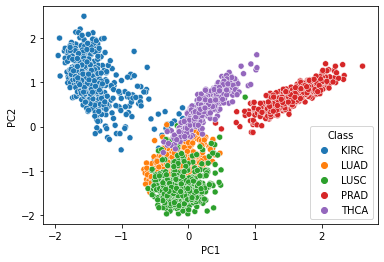

In [45]:
g = sns.scatterplot(data = df1,
                 x = "PC1",
                 y = "PC2",
                 hue = "Class")                                 #from the data of two components plot the visualization

# Drawing two violon plots – one with the values of PC1 and the other with PC2.

Text(0.5, 1.0, 'Violin plot with the values of PC1')

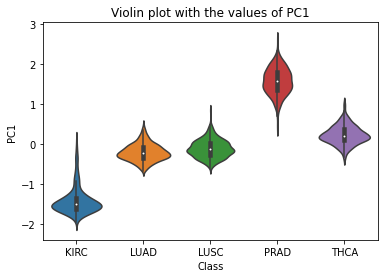

In [46]:
a = sns.violinplot(x="Class", y="PC1", data = df1)          #using violinplot() function in Seaborn to draw violin plots
a.set_title("Violin plot with the values of PC1")           #title of the PC1 violin plot

Text(0.5, 1.0, 'Violin plot with the values of PC2')

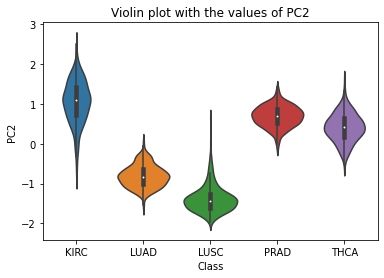

In [42]:
b = sns.violinplot(x="Label", y="PC2", data = df1)            #using violinplot() function in Seaborn to draw violin plots
b.set_title("Violin plot with the values of PC2")             #title of the PC2 violin plot

# Repeating above task  using t-SNE library. Plotting the data in reduced dimension using two t-SNE components (t-SNE 1 and t-SNE 2).

In [47]:
tdf  = Main_df                                                  #create a copy of the original dataset
tdf  = tdf.drop('Ensembl_ID',axis = 1)                          #drop a column having ID's
tdf1 = pd.get_dummies(tdf["Class"])                             #convert categorical data to binary data

In [48]:
tdf1.head()

,KIRC,LUAD,LUSC,PRAD,THCA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [49]:
tdf1.value_counts()

KIRC  LUAD  LUSC  PRAD  THCA
1     0     0     0     0       527
0     1     0     0     0       510
      0     0     0     1       501
            1     0     0       498
            0     1     0       493
dtype: int64

In [50]:
tdf.columns

Index(['ENSG00000005206.15', 'ENSG00000083622.8', 'ENSG00000088970.14',
       'ENSG00000099869.7', 'ENSG00000100181.20', 'ENSG00000104691.13',
       'ENSG00000115934.11', 'ENSG00000117242.7', 'ENSG00000118412.11',
       'ENSG00000122043.9',
       ...
       'ENSGR0000223511.4', 'ENSGR0000223571.4', 'ENSGR0000226179.4',
       'ENSGR0000230542.4', 'ENSGR0000234622.4', 'ENSGR0000236017.6',
       'ENSGR0000236871.5', 'ENSGR0000237531.4', 'ENSGR0000270726.4', 'Class'],
      dtype='object', length=12310)

In [51]:
tdf[['KIRC','LUAD','LUSC','PRAD','THCA']] = tdf1[['KIRC','LUAD','LUSC','PRAD','THCA']]   #add the converted binary data
tdf = tdf.drop('Class',axis = 1)                                                         #drop the categorical data
tdf.columns

Index(['ENSG00000005206.15', 'ENSG00000083622.8', 'ENSG00000088970.14',
       'ENSG00000099869.7', 'ENSG00000100181.20', 'ENSG00000104691.13',
       'ENSG00000115934.11', 'ENSG00000117242.7', 'ENSG00000118412.11',
       'ENSG00000122043.9',
       ...
       'ENSGR0000234622.4', 'ENSGR0000236017.6', 'ENSGR0000236871.5',
       'ENSGR0000237531.4', 'ENSGR0000270726.4', 'KIRC', 'LUAD', 'LUSC',
       'PRAD', 'THCA'],
      dtype='object', length=12314)

In [54]:
from sklearn.manifold import TSNE                              #import the model from sklearn
tsne = TSNE(n_components = 2,                                  #create the model by setting the hyperparameters
            perplexity = 35, 
            random_state = 28,
            n_iter = 4000,
            n_jobs = -1)
tdf1 = tsne.fit_transform(tdf)                                 #fit and apply t-SNE model to the data
tdf1.shape

(2529, 2)

In [55]:
tdf2 = pd.DataFrame(data = tdf1,                               #create a dataframe from transformed dataset
                         columns = ["t-SNE 1", 
                                "t-SNE 2"])
tdf2 = pd.concat([tdf2,Main_df[['Class']]],axis=1)             #concat the dropped class from original dataset
tdf2.head()

,t-SNE 1,t-SNE 2,Class
0,-5.219819,66.330246,KIRC
1,-12.823680,53.523598,KIRC
2,-10.640502,67.167732,KIRC
3,-4.906911,73.264076,KIRC
4,2.686084,67.058884,KIRC


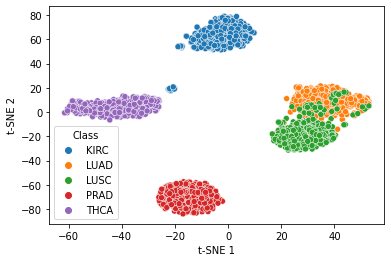

In [56]:
g = sns.scatterplot(data = tdf2,
                 x = "t-SNE 1",
                 y = "t-SNE 2",
                 hue = "Class")                                 #from the data of two components plot the visualization

# Drawing two violon plots – one with the values of t-SNE 1 and the other with t-SNE 2.

Text(0.5, 1.0, 'Violin plot with the values of t-SNE 1')

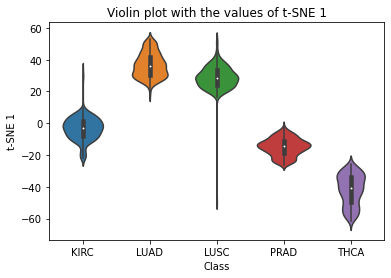

In [57]:
a = sns.violinplot(x="Class", y="t-SNE 1", data = tdf2)      #using violinplot() function in Seaborn to draw violin plots
a.set_title("Violin plot with the values of t-SNE 1")        #title of the t-SNE 1 violin plot

Text(0.5, 1.0, 'Violin plot with the values of t-SNE 2')

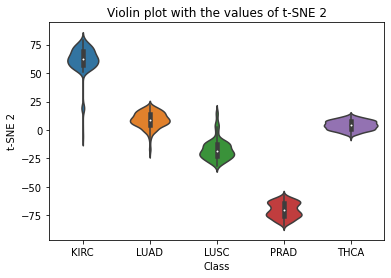

In [58]:
b = sns.violinplot(x="Class", y="t-SNE 2", data = tdf2)      #using violinplot() function in Seaborn to draw violin plots
b.set_title("Violin plot with the values of t-SNE 2")        #title of the t-SNE 2 violin plot